Vamos indicar o caminho em que está dataset usado para construção do modelo no presente exemplo. Assim, faremos a leitura do arquivo .csv.

In [3]:
# imports utilizados aqui
import os
import pandas as pd

# capturando o caminho do presente arquivo e unindo ao caminho para o dataset
iris_path = os.path.join("datasets", "iris-dataset") # datasets\iris-dataset
iris_path = '..\\' + iris_path                       # ..\datasets\iris-dataset
csv_path = os.path.join(iris_path, "iris.csv")       # caminho para o .csv
iris = pd.read_csv(csv_path)                         # leitura do dataset
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Vamos tentar ver os dados, seus formatos e algumas infomações sobre nosso dataset.

In [4]:
print(iris.head(5)) # primeiras 5 linhas
print(iris.tail(5)) # últimas 5 linhas

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
     sepal.length  sepal.width  petal.length  petal.width    variety
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica


In [5]:
iris.info()
# nenhum dado faltante; é o dataset perfeito

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

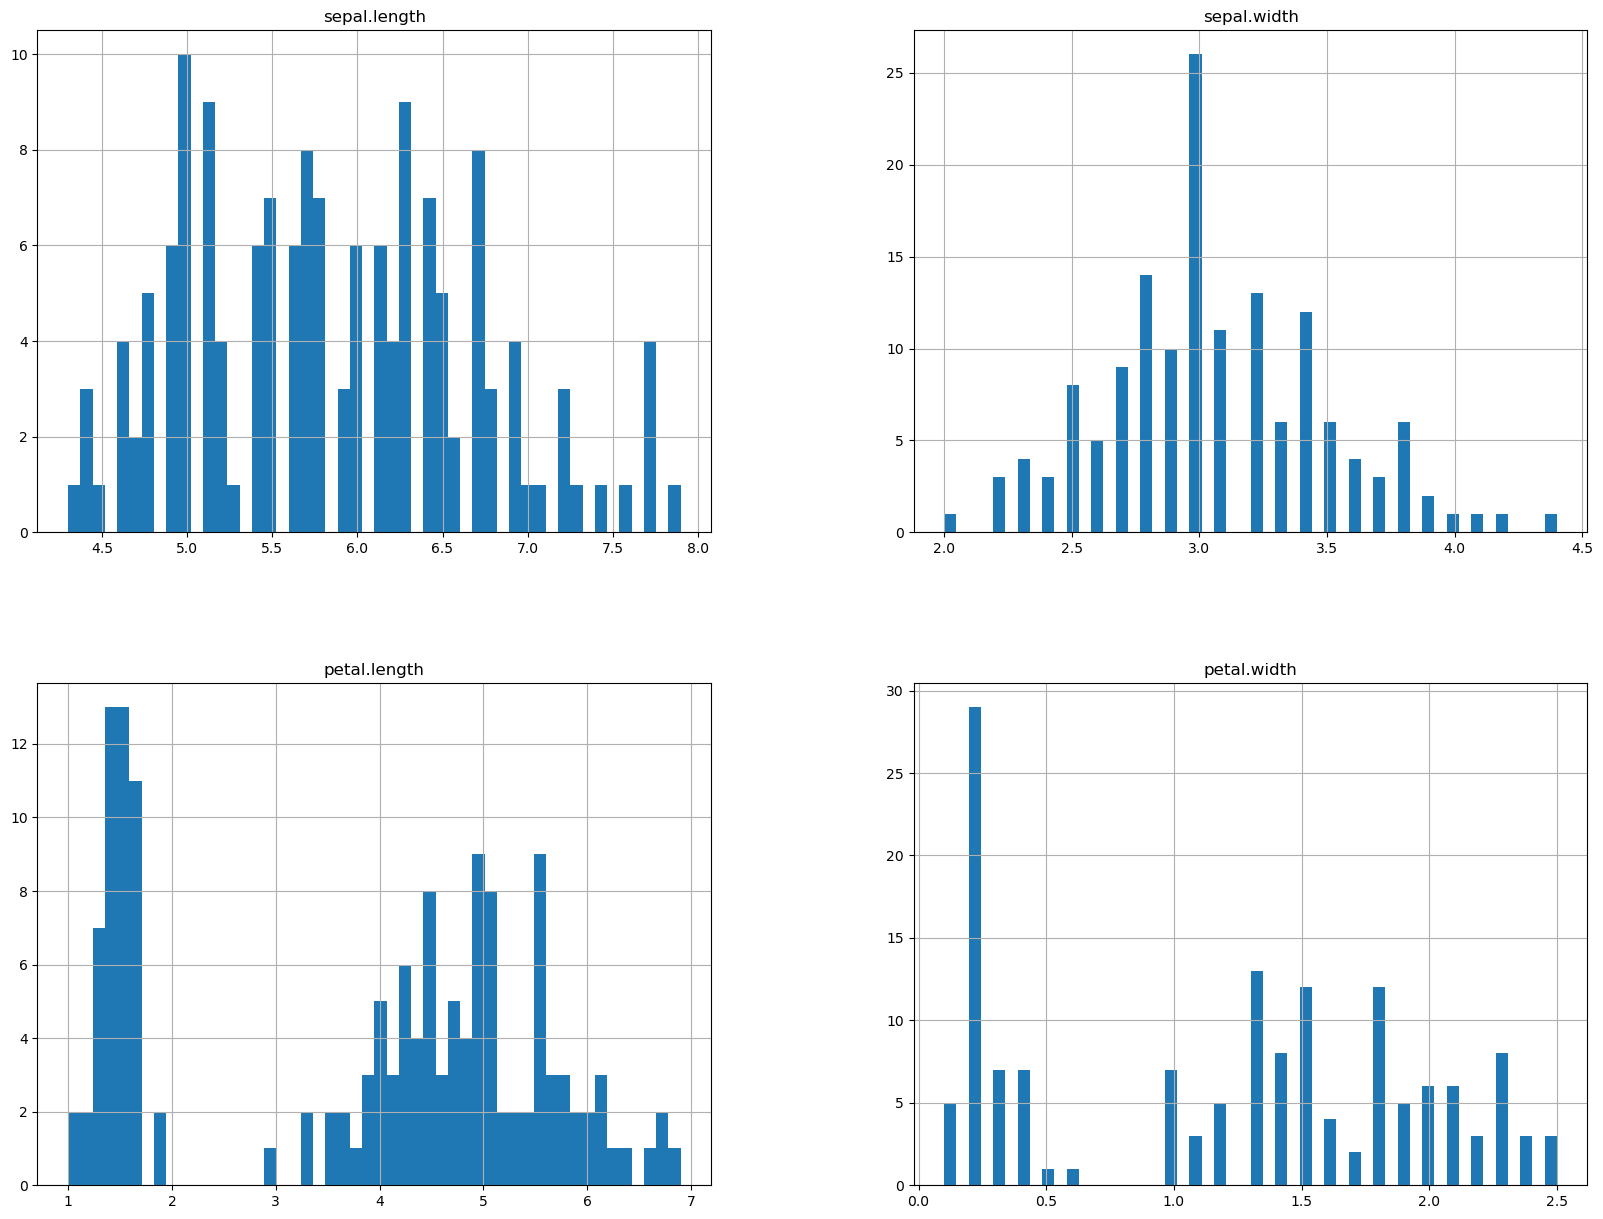

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
iris.hist(bins=50, figsize=(20,15)) # número de instâncias e valores
plt.show()

Vamos agora criar um conjunto de testes e de treinamento para o modelo.

Poderíamos considerar métodos de amostragem aleatórios, mas corremos o risco de tornar o algortimo enviesado. Por isso, vamos utilizar um método que separe em grupos com elementos representativos do conjunto inteiro.

O atributo variety é usado para distribuição dos nossos conjuntos de treinamento e teste, pois queremos que tenhamos quantidades satisfatórias dos seus valores para o treinamento e teste do nosso modelo (queremos que as três categorias existentes [Setosa, Versicolor, Virginica] nesse atributo apareçam e o modelo, assim, será preparado e treinado para reconhecer os padrões de cada uma dessas categorias).

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(iris, iris['variety']):
  strat_train_set = iris.loc[train_index]
  strat_test_set = iris.loc[test_index]

test_set_prop = strat_test_set['variety'].value_counts() / len(strat_test_set)
train_set_prop = strat_train_set['variety'].value_counts() / len(strat_train_set)
print(test_set_prop)
print(train_set_prop)
# vemos as mesmas proporções dos valores de variety

Setosa        0.333333
Virginica     0.333333
Versicolor    0.333333
Name: variety, dtype: float64
Setosa        0.333333
Virginica     0.333333
Versicolor    0.333333
Name: variety, dtype: float64


Tentaremos agora ver correlações existentes entre os atributos que temos no dataset.

In [10]:
# problema: variety tem valores em formato de string, então não entram na análise de correlação
iris.corr()


C:\Users\ludmi\AppData\Local\Temp\ipykernel_6656\2203827634.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


array([[<Axes: xlabel='sepal.length', ylabel='sepal.length'>,
        <Axes: xlabel='sepal.width', ylabel='sepal.length'>,
        <Axes: xlabel='petal.length', ylabel='sepal.length'>,
        <Axes: xlabel='petal.width', ylabel='sepal.length'>],
       [<Axes: xlabel='sepal.length', ylabel='sepal.width'>,
        <Axes: xlabel='sepal.width', ylabel='sepal.width'>,
        <Axes: xlabel='petal.length', ylabel='sepal.width'>,
        <Axes: xlabel='petal.width', ylabel='sepal.width'>],
       [<Axes: xlabel='sepal.length', ylabel='petal.length'>,
        <Axes: xlabel='sepal.width', ylabel='petal.length'>,
        <Axes: xlabel='petal.length', ylabel='petal.length'>,
        <Axes: xlabel='petal.width', ylabel='petal.length'>],
       [<Axes: xlabel='sepal.length', ylabel='petal.width'>,
        <Axes: xlabel='sepal.width', ylabel='petal.width'>,
        <Axes: xlabel='petal.length', ylabel='petal.width'>,
        <Axes: xlabel='petal.width', ylabel='petal.width'>]], dtype=object)

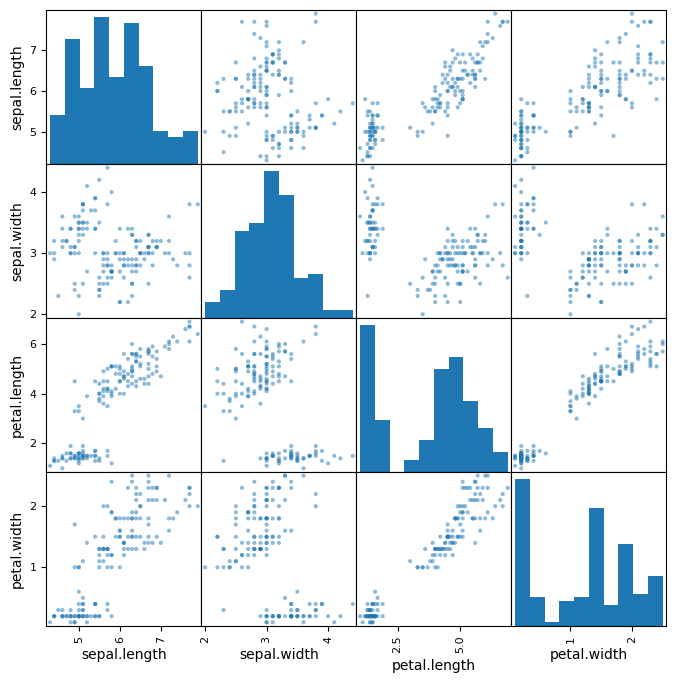

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, figsize=(8, 8))

Vamos agora preparar os dados para treinamento do modelo.

Devido ao fato de algoritmos de ML se comportarem melhor com números ao invés de strings, vamos incluir isso no pipeline de transformação e preparação dos dados.

In [14]:
from sklearn.compose import ColumnTransformer

iris = strat_train_set.drop('variety', axis=1)
iris_labels = strat_train_set['variety'].copy()

# essa é a variável com os dados preparados para o treinamento do modelo
iris_prepared = iris
print(iris_prepared)
print(iris_labels)

     sepal.length  sepal.width  petal.length  petal.width
8             4.4          2.9           1.4          0.2
106           4.9          2.5           4.5          1.7
76            6.8          2.8           4.8          1.4
9             4.9          3.1           1.5          0.1
89            5.5          2.5           4.0          1.3
..            ...          ...           ...          ...
37            4.9          3.6           1.4          0.1
2             4.7          3.2           1.3          0.2
33            5.5          4.2           1.4          0.2
52            6.9          3.1           4.9          1.5
3             4.6          3.1           1.5          0.2

[120 rows x 4 columns]
8          Setosa
106     Virginica
76     Versicolor
9          Setosa
89     Versicolor
          ...    
37         Setosa
2          Setosa
33         Setosa
52     Versicolor
3          Setosa
Name: variety, Length: 120, dtype: object


Vamos agora selecionar e treinar um modelo!

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(iris_prepared, iris_labels)

LogisticRegression()

In [22]:
some_data = iris.iloc[:10]
some_labels = iris_labels.iloc[:10]
print('Previsão: ', list(logistic_reg.predict(some_data)))
print('Rótulos:  ', list(some_labels))
# pode-se ver que o modelo erra em um dos testes
# Previsão:  ['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Virginica']
# Rótulos:   ['Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Virginica']

# testar outros modelos!

Previsão:  ['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Virginica']
Rótulos:   ['Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Virginica']
